<a href="https://colab.research.google.com/github/sarveesh/mastersProject/blob/develop/map%26conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/giuliogamba/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5497, done.
remote: Total 5497 (delta 0), reused 0 (delta 0), pack-reused 5497
Receiving objects: 100% (5497/5497), 4.63 MiB | 10.48 MiB/s, done.
Resolving deltas: 100% (3658/3658), done.


In [ ]:
%ls

darknet/  sample_data/


In [ ]:
%cd /content/darknet/

/content/darknet


In [ ]:
!make

gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DGPU -DCUDNN -c ./examples/detector.c -o obj/detector.o
./examples/detector.c: In function ‘draw_detection_python’:
./examples/detector.c:644:21: warning: implicit declaration of function ‘load_alphabet_path’; did you mean ‘load_alphabet’? [-Wimplicit-function-declaration]
  image **alphabet = load_alphabet_path(path_darknet);
                     ^~~~~~~~~~~~~~~~~~
                     load_alphabet
./examples/detector.c:644:21: warning: initialization makes pointer from integer without a cast [-Wint-conversion]
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchr

In [ ]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar

--2021-08-16 12:16:50--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  63.0MB/s    in 19s     

2021-08-16 12:17:09 (99.8 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2021-08-16 12:17:09--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M   102MB/s    in 4.3s    

2021-08-16 12:17:14 (102 MB/

In [ ]:
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

In [ ]:
!wget https://pjreddie.com/media/files/voc_label.py

--2021-08-16 12:17:48--  https://pjreddie.com/media/files/voc_label.py
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2042 (2.0K) [application/octet-stream]
Saving to: ‘voc_label.py’

voc_label.py        100%[===================>]   1.99K  --.-KB/s    in 0s      

2021-08-16 12:17:48 (544 MB/s) - ‘voc_label.py’ saved [2042/2042]



In [ ]:
!cat voc_label.py

import xml.etree.ElementTree as ET
import pickle
import os
from os import listdir, getcwd
from os.path import join

sets=[('2012', 'train'), ('2012', 'val'), ('2007', 'train'), ('2007', 'val'), ('2007', 'test')]

classes = ["person"] 

def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

def convert_annotation(year, image_id):
    in_file = open('VOCdevkit/VOC%s/Annotations/%s.xml'%(year, image_id))
    out_file = open('VOCdevkit/VOC%s/labels/%s.txt'%(year, image_id), 'w')
    tree=ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult) == 1

In [ ]:
!python voc_label.py

In [ ]:
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls

cfg/            LICENSE       Makefile   train.txt
darknet*        LICENSE.fuck  obj/       VOCdevkit/
data/           LICENSE.gen   python/    voc_label.py
examples/       LICENSE.gpl   README.md  VOCtest_06-Nov-2007.tar
include/        LICENSE.meta  results/   VOCtrainval_06-Nov-2007.tar
libdarknet.a    LICENSE.mit   scripts/   VOCtrainval_11-May-2012.tar
libdarknet.so*  LICENSE.v1    src/


In [ ]:
!./darknet detector test cfg/voc.data /content/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/customCfgVocTee/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights data/person.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 2   416 x 416 x   3   ->   208 x 208 x  16
    1 conv     64  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  64
    2 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    3 conv     64  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x  64
    4 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    5 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128
    6 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    7 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256
    8 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
    9 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512
   10 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   11 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512
   13 conv     30  1 x 

In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')

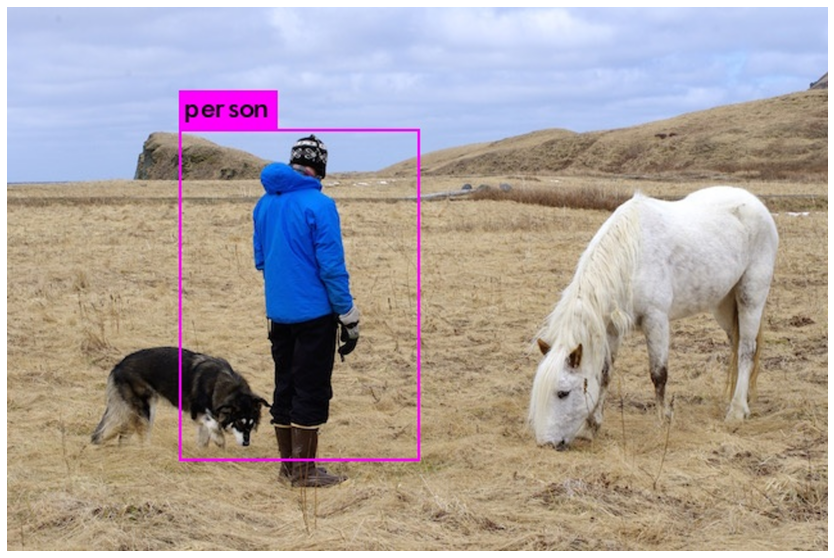

In [ ]:
imShow('predictions.jpg')

map trials

In [ ]:
!./darknet detector map cfg/voc.data /content/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg  /content/drive/MyDrive/customCfgVocTee/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights  -dont_show -ext_output  < /content/darknet/train.txt > result.txt
 



In [ ]:
!./darknet detector map cfg/voc.data /content/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg  /content/drive/MyDrive/customCfgVocTee/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights data/person.jpg > /content/darknet/map_result.txt


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74


--2021-08-16 12:42:02--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   104MB/s    in 1.5s    

2021-08-16 12:42:04 (104 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector map cfg/voc.data darknet53.conv.74  -dont_show -ext_output  < train.txt > result.txt


In [ ]:
%ls

2007_test.txt   include/        LICENSE.v1       scripts/
2007_train.txt  libdarknet.a    Makefile         src/
2007_val.txt    libdarknet.so*  map_result.txt   train.txt
2012_train.txt  LICENSE         obj/             VOCdevkit/
2012_val.txt    LICENSE.fuck    predictions.jpg  voc_label.py
cfg/            LICENSE.gen     python/          VOCtest_06-Nov-2007.tar
darknet*        LICENSE.gpl     README.md        VOCtrainval_06-Nov-2007.tar
data/           LICENSE.meta    results/         VOCtrainval_11-May-2012.tar
examples/       LICENSE.mit     result.txt


Conversion to .pt or onnx trials 

In [ ]:
import torch 
print(torch.__version__)


1.9.0+cu102


In [ ]:
!pip install wf-pytorch-yolo-v4

     |████████████████████████████████| 124 kB 10.3 MB/s 
     |████████████████████████████████| 248 kB 14.1 MB/s 
  Created wheel for wf-pycocotools: filename=wf_pycocotools-2.0.1.1-cp37-cp37m-linux_x86_64.whl size=380200 sha256=faa2038a396bc8a37818e28c6b6b382b71f78849cf34d56b38527da0c4a4f140
  Stored in directory: /root/.cache/pip/wheels/dd/61/05/e5c4752a51f3465fcb1c6ecfd4e190b96a7aa96ed354b80bac
Successfully built wf-pycocotools


In [ ]:
!pip install onnxruntime


     |████████████████████████████████| 4.5 MB 7.5 MB/s 


In [ ]:
from tool.darknet2pytorch import Darknet
WEIGHTS = Darknet(cfgfile)
WEIGHTS.load_weights(weightfile)

ModuleNotFoundError: ignored

In [ ]:
!python demo_darknet2onnx.py cfg/voc.data darknet53.conv.74 <imageFile> <batchSize>


/bin/bash: -c: line 0: syntax error near unexpected token `<'
/bin/bash: -c: line 0: `python demo_darknet2onnx.py <cfgFile> <weightFile> <imageFile> <batchSize>'


In [ ]:
%ls

2007_test.txt      examples/       LICENSE.mit      result.txt
2007_train.txt     include/        LICENSE.v1       scripts/
2007_val.txt       libdarknet.a    Makefile         src/
2012_train.txt     libdarknet.so*  map_result.txt   train.txt
2012_val.txt       LICENSE         obj/             VOCdevkit/
cfg/               LICENSE.fuck    predictions.jpg  voc_label.py
darknet*           LICENSE.gen     python/          VOCtest_06-Nov-2007.tar
darknet53.conv.74  LICENSE.gpl     README.md        VOCtrainval_06-Nov-2007.tar
data/              LICENSE.meta    results/         VOCtrainval_11-May-2012.tar


In [ ]:
from tool import darknet2pytorch
import torch

# load weights from darknet format
model = darknet2pytorch.Darknet('path/to/cfg/yolov4-416.cfg', inference=True)
model.load_weights('path/to/weights/yolov4-416.weights')

# save weights to pytorch format
torch.save(model.state_dict(), 'path/to/save/yolov4-pytorch.pth')

# reload weights from pytorch format
model_pt = darknet2pytorch.Darknet('path/to/cfg/yolov4-416.cfg', inference=True)
model_pt.load_state_dict(torch.load('path/to/save/yolov4-pytorch.pth'))

ModuleNotFoundError: ignored

In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://gitee.com/msnh/pytorch-caffe-darknet-convert.git

Cloning into 'pytorch-caffe-darknet-convert'...
remote: Enumerating objects: 430, done.
remote: Total 430 (delta 0), reused 0 (delta 0), pack-reused 430
Receiving objects: 100% (430/430), 1.18 MiB | 1.23 MiB/s, done.
Resolving deltas: 100% (255/255), done.


In [ ]:
%cd pytorch-caffe-darknet-convert/

/content/pytorch-caffe-darknet-convert


In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights
#!wget https://github.com/pjreddie/darknet/blob/master/cfg/tiny-yolo-voc.cfg

--2021-08-16 13:14:15--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  96.5MB/s    in 0.4s    

2021-08-16 13:14:16 (96.5 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



To install caffe

In [ ]:
!python darknet2caffe.py yolov3-tiny.cfg yolov3-tiny.weights tiny-yolo-voc.prototxt tiny-yolo-voc.caffemodel


Traceback (most recent call last):
  File "darknet2caffe.py", line 3, in <module>
    import caffe
ModuleNotFoundError: No module named 'caffe'


In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/Tianxiaomo/pytorch-YOLOv4.git

Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 917, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 917 (delta 0), reused 0 (delta 0), pack-reused 914
Receiving objects: 100% (917/917), 2.34 MiB | 10.90 MiB/s, done.
Resolving deltas: 100% (557/557), done.


In [ ]:
!pip install onnxruntime


In [ ]:
%cd pytorch-YOLOv4/

/content/pytorch-YOLOv4


In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights


--2021-08-16 13:20:29--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  94.9MB/s    in 0.4s    

2021-08-16 13:20:29 (94.9 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [ ]:
pip install onnx


     |████████████████████████████████| 12.3 MB 7.8 MB/s 


In [ ]:
!python demo_darknet2onnx.py yolov3-tiny.cfg yolov3-tiny.weights /data/dog.jpg 1


Converting to onnx and running demo ...
convalution havn't activate linear
Traceback (most recent call last):
  File "demo_darknet2onnx.py", line 71, in <module>
    main(cfg_file, weight_file, image_path, batch_size)
  File "demo_darknet2onnx.py", line 19, in main
    transform_to_onnx(cfg_file, weight_file, batch_size)
  File "/content/pytorch-YOLOv4/tool/darknet2onnx.py", line 7, in transform_to_onnx
    model = Darknet(cfgfile)
  File "/content/pytorch-YOLOv4/tool/darknet2pytorch.py", line 136, in __init__
    self.models = self.create_network(self.blocks)  # merge conv, bn,leaky
  File "/content/pytorch-YOLOv4/tool/darknet2pytorch.py", line 401, in create_network
    yolo_layer.scale_x_y = float(block['scale_x_y'])
KeyError: 'scale_x_y'


In [ ]:
from tool import darknet2pytorch
import torch

# load weights from darknet format
model = darknet2pytorch.Darknet('./yolov3-tiny.cfg', inference=True)
model.load_weights('./yolov3-tiny.weights')

# save weights to pytorch format
torch.save(model.state_dict(), 'yolov4-pytorch.pth')

# reload weights from pytorch format
model_pt = darknet2pytorch.Darknet('yolov4-416.cfg', inference=True)
model_pt.load_state_dict(torch.load('yolov4-pytorch.pth'))

convalution havn't activate linear


KeyError: ignored